 Unit 2- Lesson 2- Project 7
 

### Challenge: Iterate and Evaluate your classifiers

It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

Do any of your classifiers seem to overfit?
Which seem to perform the best? Why?
Which features seemed to be most impactful to performance?
Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance.

In [1]:
#import python packages
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data from amazon and label comlumns
data_file = ("amazon_cells_labelled.txt")
amz_snt = pd.read_csv(data_file, delimiter= '\t', header=None)
amz_snt.columns = ['message','sentiment']

In [3]:
#updated keywords for sentiment and removed spaces before key
keywords = [ 'love' , 'loved' , 'disappointed', 'very', 'happy', 'excellent', 'highly' , 'amazing' , 'terrible' , 'awful' , 'never' , '!' , 'best' , 'worst']

for key in keywords:
    amz_snt[str(key)] = amz_snt.message.str.contains(str(key), case=False)
    

In [4]:
#consider 'allcaps' for sentiment
amz_snt['allcaps'] = amz_snt.message.str.isupper()

In [5]:
#values for 'positive' and 'neative' were predefined set to boolean
amz_snt['positive'] = (amz_snt['sentiment'] == 1)
amz_snt['negative'] = (amz_snt['sentiment'] == 0)


In [6]:
amz_snt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
message         1000 non-null object
sentiment       1000 non-null int64
love            1000 non-null bool
loved           1000 non-null bool
disappointed    1000 non-null bool
very            1000 non-null bool
happy           1000 non-null bool
excellent       1000 non-null bool
highly          1000 non-null bool
amazing         1000 non-null bool
terrible        1000 non-null bool
awful           1000 non-null bool
never           1000 non-null bool
!               1000 non-null bool
best            1000 non-null bool
worst           1000 non-null bool
allcaps         1000 non-null bool
positive        1000 non-null bool
negative        1000 non-null bool
dtypes: bool(17), int64(1), object(1)
memory usage: 32.3+ KB


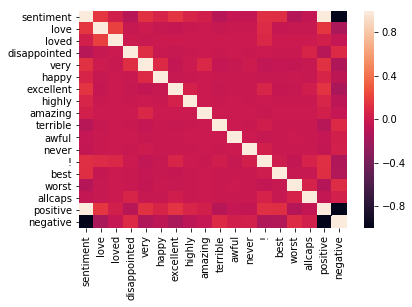

In [7]:
#visualize the data
sns.heatmap(amz_snt.corr())

In [8]:
amz_snt.amazing.sum()

1

In [9]:
#define target and data
data_amz = amz_snt[keywords]
target = amz_snt['sentiment']

In [10]:
#accuracy measure

from sklearn.naive_bayes import BernoulliNB

# Instantiate  model and store it in a new variable.
bnb = BernoulliNB()

# Fit model to the data.
bnb.fit(data_amz, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_amz)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_amz.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 350


In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[435,  65],
       [285, 215]])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_amz, target, test_size=0.3, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data_amz, target).score(data_amz, target)))

With 20% Holdout: 0.63
Testing on Sample: 0.65


In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data_amz, target, cv=5)

array([0.66 , 0.66 , 0.695, 0.61 , 0.6  ])

### Plug in a new data set

In [14]:
data_file = ("yelp_labelled.txt")
yp_snt = pd.read_csv(data_file, delimiter= '\t', header=None)
yp_snt.columns = ['message','sentiment']

In [15]:
for key in keywords:
   yp_snt[str(key)] = yp_snt.message.str.contains(str(key), case=False)

In [16]:
yp_snt['allcaps'] = yp_snt.message.str.isupper()

In [17]:
yp_snt['positive'] = (yp_snt['sentiment'] == 1)
yp_snt['negative'] = (yp_snt['sentiment'] == 0)

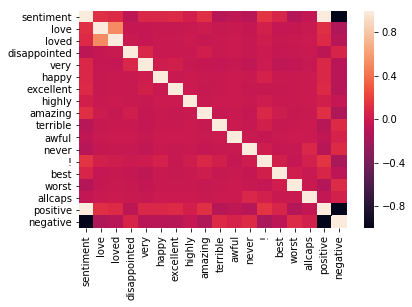

In [18]:
sns.heatmap(yp_snt.corr())

In [19]:
data_yp = yp_snt[keywords]
yp_target = yp_snt['sentiment']

In [20]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate  model and store it in a new variable.
yp_bnb = BernoulliNB()

# Fit model to the data.
yp_bnb.fit(data_yp, yp_target)

# Classify, storing the result in a new variable.
yp_y_pred = yp_bnb.predict(data_yp)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_yp.shape[0],
    (yp_target != yp_y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 358


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[435,  65],
       [285, 215]])